In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from torchsummary import summary


In [5]:
df = pd.read_csv("D:/repos/udemy/.dataset/winequality_red.csv", sep=';')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
corr = df.corr()

<Axes: >

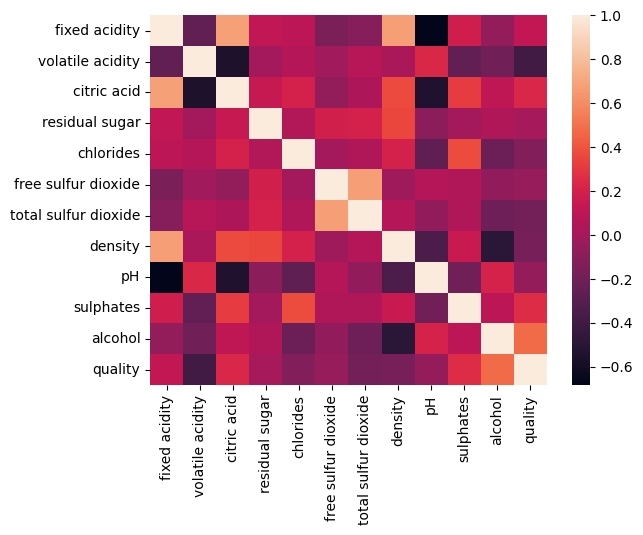

In [9]:
sns.heatmap(corr)

In [10]:
# Normalizing the data
cols = df.columns.values.tolist()
cols.remove('residual sugar')

In [11]:
df[cols] = df[cols].apply(stats.zscore)

In [12]:
round(df.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,0.00,0.00,-0.00,2.54,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.41,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.14,-2.28,-1.39,0.90,-1.60,-1.42,-1.23,-3.54,-3.70,-1.94,-1.90,-3.27
25%,-0.70,-0.77,-0.93,1.90,-0.37,-0.85,-0.74,-0.61,-0.66,-0.64,-0.87,-0.79
50%,-0.24,-0.04,-0.06,2.20,-0.18,-0.18,-0.26,0.00,-0.01,-0.23,-0.21,0.45
75%,0.51,0.63,0.77,2.60,0.05,0.49,0.47,0.58,0.58,0.42,0.64,0.45
max,4.36,5.88,3.74,15.50,11.13,5.37,7.38,3.68,4.53,7.92,4.20,2.93


<Axes: xlabel='residual sugar', ylabel='Count'>

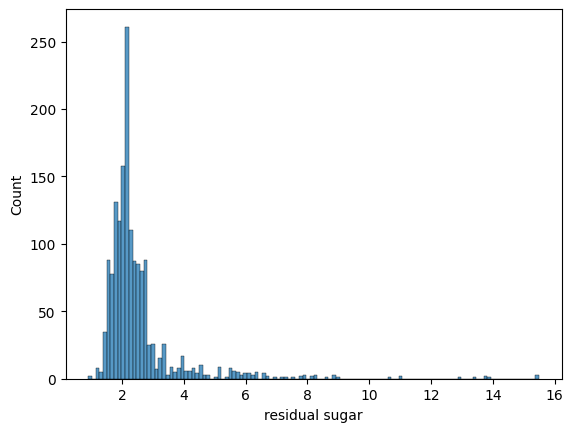

In [13]:
sns.histplot(df['residual sugar'])

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,1.9,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,2.6,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,2.3,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,1.9,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,1.9,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [15]:
df[cols].head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [16]:
tf_data = torch.tensor(df[cols].values).float()
tf_labels = torch.tensor(df['residual sugar']).float()
print(tf_data.shape)
print(tf_labels.shape)

torch.Size([1599, 11])
torch.Size([1599])


In [17]:
# We need to convert the labels to one dimensional tensor
tf_labels = tf_labels[:, None]
print(tf_labels.shape)

torch.Size([1599, 1])


In [18]:
x_train, x_test, y_train, y_test = train_test_split(tf_data, tf_labels, train_size=0.7)
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

batch = 64
train_loader = DataLoader(train_data, batch_size=batch, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [19]:
test_data.tensors[0].shape[0]

480

In [20]:
for x, y in train_loader:
    print(x.shape, y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])


# Model

In [21]:
class model(nn.Module):
    def  __init__(self):
        super().__init__()
        self.input = nn.Linear(11, 64)
        self.hidden1 = nn.Linear(64, 64)
        self.hidden2 = nn.Linear(64, 64)
        self.output = nn.Linear(64,1)
    def forward(self, x):
        x = torch.relu(self.input(x))
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        return self.output(x)

In [22]:
ann = model()

In [23]:
summary(ann, (10,11))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 10, 64]              768
├─Linear: 1-2                            [-1, 10, 64]              4,160
├─Linear: 1-3                            [-1, 10, 64]              4,160
├─Linear: 1-4                            [-1, 10, 1]               65
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.05


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 10, 64]              768
├─Linear: 1-2                            [-1, 10, 64]              4,160
├─Linear: 1-3                            [-1, 10, 64]              4,160
├─Linear: 1-4                            [-1, 10, 1]               65
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.05

In [24]:
lossfn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(ann.parameters(), lr=0.01)

In [25]:
epochs = 100
def train():
    train_loss = []
    test_loss = []
    for i in range(epochs):
        ann.train()
        batchloss = []
        for xtrain, ytrain in train_loader:
            yhat = ann(xtrain)
            loss = lossfn(yhat, ytrain) 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            batchloss.append(loss.detach().numpy())  
        train_loss.append(np.mean(batchloss))
        ann.eval()
        xtest, ytest = next(iter(test_loader))
        with torch.no_grad():
            pred = ann(xtest)
        test_loss.append(lossfn(pred, ytest).item())

    return train_loss, test_loss

In [26]:
train_loss, test_loss = train()

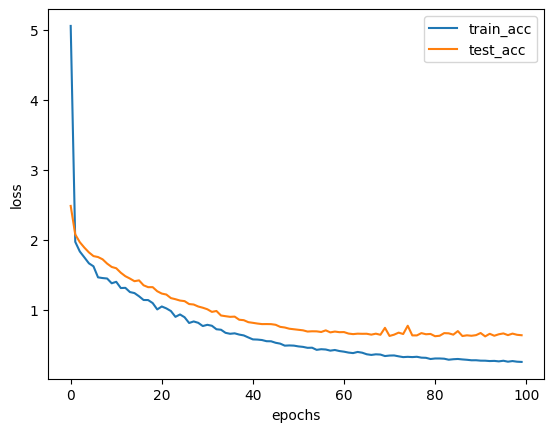

In [27]:
plt.plot(range(epochs), train_loss)
plt.plot(range(epochs), test_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_acc', 'test_acc'])

In [28]:
pred_train = ann(x_train)
pred_test = ann(x_test)

In [46]:
np.corrcoef(pred_train.detach().T, y_train.T)[1,0]

0.9354602206280891

In [45]:
np.corrcoef(pred_test.detach().T, y_test.T)[1,0]

0.8603789318560192